In [19]:
from IPython.core.display import Image
from IPython.lib.display import Audio
import yaml
import os
from pathlib import Path
from gradio_client import Client, handle_file

In [20]:
client = Client("http://localhost:7860/")
root_dir = Path(os.getcwd()).parent.parent
voice = "grug"

Loaded as API: http://localhost:7860/ ✔


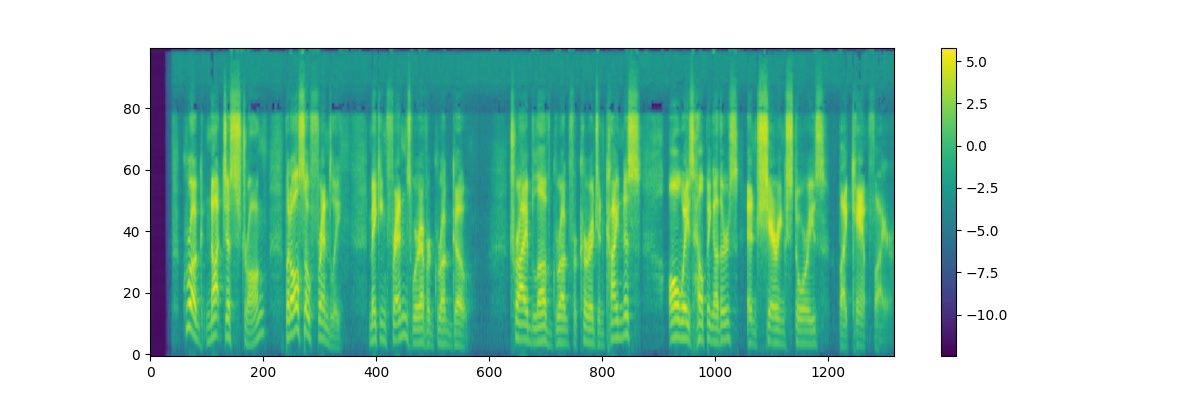

In [21]:
client.predict(
    new_choice="F5-TTS",
    api_name="/switch_tts_model"
)

result = client.predict(
    ref_audio_input=handle_file(root_dir / "assets" / "bot_voices" / f"{voice}.wav"),
    ref_text_input=yaml.safe_load((root_dir / "assets" / "bot_voices" / "reference_text.yml").read_text())[voice],
    gen_text_input="Grug not just strong, but also friendly, making friends wherever Grug go. Tribe love Grug for courage and kindness, always helping others and sharing stories by campfire.",
    remove_silence=False,
    cross_fade_duration_slider=0.15,
    nfe_slider=32,
    speed_slider=1,
    api_name="/basic_tts"
)

display(Audio(result[0]))
display(Image(filename=result[1]))